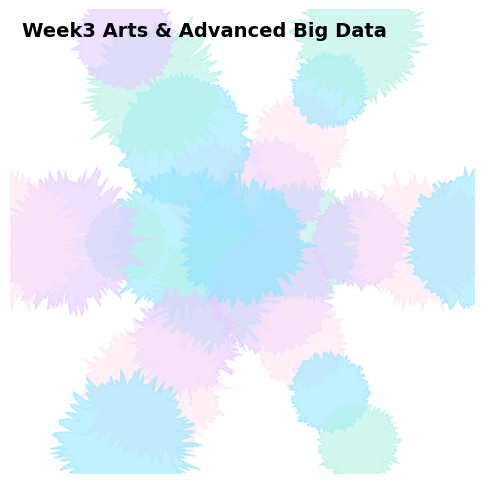

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

def blob(x_center, y_center, radius=1.0, wobble=0.1, n_points=200):
    """
    Generate one irregular circular blob.
    """
    angles = np.linspace(0, 2*np.pi, n_points)
    radii = radius * (1 + wobble * np.random.randn(n_points))
    x = x_center + radii * np.cos(angles)
    y = y_center + radii * np.sin(angles)
    return x, y

def snow_palette():
    """
    Define snowflake-inspired palette (icy pastel colors).
    """
    return [
        (0.6, 0.9, 1.0, 0.6),
        (0.7, 0.95, 0.9, 0.6),
        (0.9, 0.8, 1.0, 0.6),
        (1.0, 0.9, 0.95, 0.6)
    ]

def generate_snowflake_poster(seed=None, n_arms=6, n_layers=4, wobble_min=0.05, wobble_max=0.15):
    """
    Generate a poster with blobs arranged in a snowflake-like radial pattern.
    """
    if seed is not None:
        np.random.seed(seed)
        random.seed(seed)

    fig, ax = plt.subplots(figsize=(6, 8))
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_facecolor("whitesmoke")

    colors = snow_palette()
    center_x, center_y = 0, 0

    for arm in range(n_arms):
        theta = 2 * np.pi * arm / n_arms
        for layer in range(1, n_layers + 1):
            distance = layer * 2.5
            x_center = center_x + distance * np.cos(theta)
            y_center = center_y + distance * np.sin(theta)

            radius = random.uniform(1.5, 3.0)
            wobble = random.uniform(wobble_min, wobble_max)

            x, y = blob(x_center, y_center, radius, wobble)
            ax.fill(x, y, color=colors[(arm + layer) % len(colors)], alpha=0.6)

    x, y = blob(center_x, center_y, radius=2.5, wobble=0.1)
    ax.fill(x, y, color=colors[0], alpha=0.7)

    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)

    ax.text(-9.5, 9.5, "Week3 Arts & Advanced Big Data",
            fontsize=14, weight='bold', ha="left", va="top")

    return fig

fig = generate_snowflake_poster(seed=42, n_arms=6, n_layers=4)
fig.savefig("poster_snowflake.png", dpi=300, bbox_inches="tight")
plt.show()
